Name : Mahesh Jagtap Reg No.24MCS1017


PART - B
 Choose another dataset

 1) Build base CNN model

2) Change the number of convolution layers, filter size, number of filters, padding (with and without), stride ( default and 2, 3 etc.) pooling (average / max), epochs, activation functions etc.

3) Interpret your results by observing the parameters.

4) For every change, give the justification with the following information. Input size, number of kernels, filter size, output size, number of trainable parameters, non-trainable parameters etc.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


## Load and Preprocess Dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# for downloaded data

import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

# Define dataset directory (Change this path)
dataset_dir = "path/to/your/fashion_mnist_folder"

# Define class labels (Fashion MNIST has 10 categories)
categories = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Initialize lists to store images and labels
images = []
labels = []

# Load images from each category folder
for label, category in enumerate(categories):
    category_dir = os.path.join(dataset_dir, category)
    for filename in os.listdir(category_dir):
        img_path = os.path.join(category_dir, filename)
        img = load_img(img_path, color_mode="grayscale", target_size=(28, 28))  # Convert to grayscale
        img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0,1]
        images.append(img_array)
        labels.append(label)

# Convert lists to NumPy arrays
images = np.array(images).reshape(-1, 28, 28, 1)  # Reshape to (28,28,1)
labels = np.array(labels)

# Split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42, stratify=labels
)

# Print shape to verify
print("Train images shape:", x_train.shape)
print("Test images shape:", x_test.shape)
print("Train labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)


## Base CNN Model
This is the baseline model for comparison.

In [3]:
base_model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
base_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_base = base_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.8146 - loss: 0.5188 - val_accuracy: 0.8864 - val_loss: 0.3118
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9034 - loss: 0.2678 - val_accuracy: 0.9017 - val_loss: 0.2655
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 22ms/step - accuracy: 0.9210 - loss: 0.2168 - val_accuracy: 0.9049 - val_loss: 0.2625
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 22ms/step - accuracy: 0.9321 - loss: 0.1851 - val_accuracy: 0.9061 - val_loss: 0.2661
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 21ms/step - accuracy: 0.9429 - loss: 0.1547 - val_accuracy: 0.9125 - val_loss: 0.2644
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.9497 - loss: 0.1310 - val_accuracy: 0.9134 - val_loss: 0.2660
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9601 - loss: 0.1131 - val_accuracy: 0.9109 - val_loss: 0.2770
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9667 -

313/313 - 2s - 5ms/step - accuracy: 0.9146 - loss: 0.3123


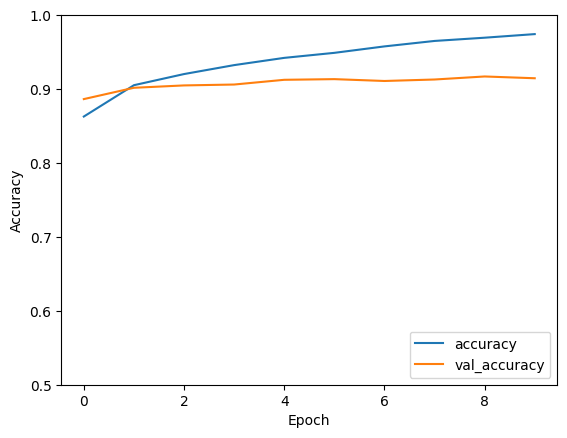

In [5]:
plt.plot(history_base.history['accuracy'], label='accuracy')
plt.plot(history_base.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = base_model.evaluate(x_test,  y_test, verbose=2)

## Change 1: Increasing Convolution Layers


In [7]:
conv_layer_model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
conv_layer_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_conv_layer = conv_layer_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 159s 84ms/step - accuracy: 0.8140 - loss: 0.5129 - val_accuracy: 0.8937 - val_loss: 0.2968
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 197s 81ms/step - accuracy: 0.9112 - loss: 0.2455 - val_accuracy: 0.9027 - val_loss: 0.2516
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 205s 83ms/step - accuracy: 0.9324 - loss: 0.1824 - val_accuracy: 0.9165 - val_loss: 0.2437
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 197s 80ms/step - accuracy: 0.9464 - loss: 0.1389 - val_accuracy: 0.9143 - val_loss: 0.2497
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 203s 81ms/step - accuracy: 0.9632 - loss: 0.1001 - val_accuracy: 0.9163 - val_loss: 0.2603


TypeError: 'History' object is not subscriptable

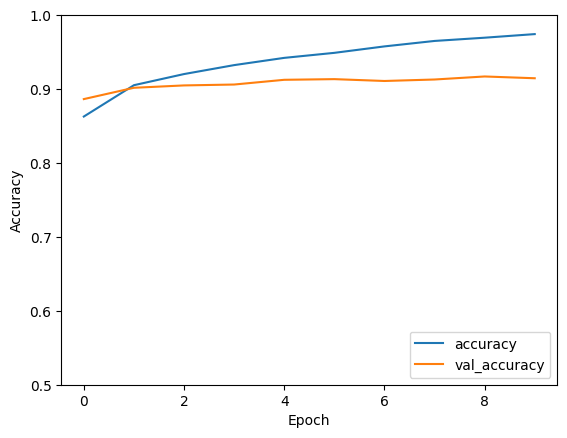

313/313 - 6s - 20ms/step - accuracy: 0.9163 - loss: 0.2603
Test Accuracy: 0.9163, Test Loss: 0.2603


In [12]:
plt.plot(history_base.history['accuracy'], label='accuracy')
plt.plot(history_base.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()  # Ensure the plot is displayed

# Evaluate the model
test_loss, test_acc = conv_layer_model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")


## Change 2: Modifying Filter Size


In [13]:
filter_size_model = keras.Sequential([
    keras.layers.Conv2D(32, (5,5), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
filter_size_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_filter_size = filter_size_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 0.8041 - loss: 0.5428 - val_accuracy: 0.8849 - val_loss: 0.3239
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 22ms/step - accuracy: 0.8998 - loss: 0.2789 - val_accuracy: 0.8996 - val_loss: 0.2821
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9141 - loss: 0.2326 - val_accuracy: 0.9012 - val_loss: 0.2731
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 22ms/step - accuracy: 0.9275 - loss: 0.1969 - val_accuracy: 0.9007 - val_loss: 0.2702
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9374 - loss: 0.1668 - val_accuracy: 0.9138 - val_loss: 0.2502


## Change 3: Padding (with vs. without)


In [20]:
padding_model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
padding_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_padding = padding_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 24ms/step - accuracy: 0.8173 - loss: 0.5176 - val_accuracy: 0.8879 - val_loss: 0.3069
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9048 - loss: 0.2622 - val_accuracy: 0.8915 - val_loss: 0.3017
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 23ms/step - accuracy: 0.9220 - loss: 0.2120 - val_accuracy: 0.9090 - val_loss: 0.2498
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 24ms/step - accuracy: 0.9307 - loss: 0.1854 - val_accuracy: 0.9052 - val_loss: 0.2611
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - accuracy: 0.9416 - loss: 0.1578 - val_accuracy: 0.9072 - val_loss: 0.2670


## Change 4: Modifying Stride


In [22]:
stride_model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), strides=2, activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
stride_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_stride = stride_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7538 - loss: 0.6898 - val_accuracy: 0.8529 - val_loss: 0.4156
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8629 - loss: 0.3794 - val_accuracy: 0.8670 - val_loss: 0.3683
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8822 - loss: 0.3275 - val_accuracy: 0.8726 - val_loss: 0.3444
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8936 - loss: 0.2934 - val_accuracy: 0.8816 - val_loss: 0.3180
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9021 - loss: 0.2664 - val_accuracy: 0.8902 - val_loss: 0.3090


## Model Comparisons
We now compare accuracy for all variations.

Base Model Final Accuracy: 0.9743166565895081
More Conv Layers Final Accuracy: 0.9612166881561279
Larger Filters Final Accuracy: 0.9368000030517578
With Padding Final Accuracy: 0.9411333203315735
Stride=2 Final Accuracy: 0.9016166925430298


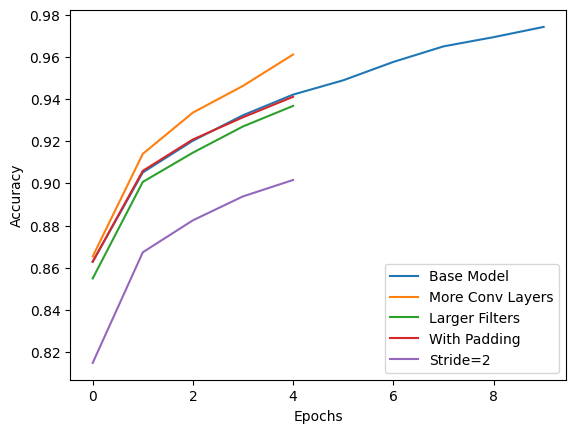

In [25]:
# Print final accuracy values for each model
print("Base Model Final Accuracy:", history_base.history['accuracy'][-1])
print("More Conv Layers Final Accuracy:", history_conv_layer.history['accuracy'][-1])
print("Larger Filters Final Accuracy:", history_filter_size.history['accuracy'][-1])
print("With Padding Final Accuracy:", history_padding.history['accuracy'][-1])
print("Stride=2 Final Accuracy:", history_stride.history['accuracy'][-1])

# Plot the graph
plt.plot(history_base.history['accuracy'], label='Base Model')
plt.plot(history_conv_layer.history['accuracy'], label='More Conv Layers')
plt.plot(history_filter_size.history['accuracy'], label='Larger Filters')
plt.plot(history_padding.history['accuracy'], label='With Padding')
plt.plot(history_stride.history['accuracy'], label='Stride=2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**Conclusion**:

 Adding more convolutional layers significantly improves accuracy 0.96, demonstrating the value of deeper networks for extracting complex features. The base model performs robustly with a final accuracy of 0.975, while modifications like larger filters and padding yield similar results 0.94 with minimal impact. In contrast, increasing the stride to 2 limits accuracy to 0.9, likely due to the loss of spatial details in feature extraction. Overall, increasing depth proves most effective, whereas stride adjustments should be made cautiously to avoid compromising performance.